In [1]:
options(jupyter.rich_display = F)

# Matrices

# Matrix objects in R
In R, a **matrix** is a vector, with two additional attributes:
* Number of rows
* Number of columns

As with vectors, every element of a matrix must be of the same _mode_ ; either purely numeric, or purely text, etc.

Creating a matrix from a vector
===============

Given a vector, convert it to a matrix by specifying the number of rows and columns.

In [2]:
m <- matrix( c(1,2,3,4), nrow=2, ncol=2)
m

     [,1] [,2]
[1,] 1    3   
[2,] 2    4   

# Properties

In [3]:
attributes(m)

$dim
[1] 2 2


In [4]:
dim(m)

[1] 2 2

In [5]:
class(m)

[1] "matrix"

# Column-major and row-major ordering

* Note that by default, the columns of the matrix are filled with the vector's elements, in order.

In [6]:
matrix(1:6, nrow=3, ncol=2)

     [,1] [,2]
[1,] 1    4   
[2,] 2    5   
[3,] 3    6   

* This is called the _column-major order_.

* To force a *row-major order*, set the `byrow` parameter to `TRUE`.

In [7]:
matrix( 1:6, nrow=3, ncol=2, byrow=TRUE )

     [,1] [,2]
[1,] 1    2   
[2,] 3    4   
[3,] 5    6   

# Specify only nrow or ncol
If we provide only `nrow` or only `ncol`, the unspecified parameter will be determined using the length of the vector.

In [8]:
matrix( 1:6, nrow=2 )

     [,1] [,2] [,3]
[1,] 1    3    5   
[2,] 2    4    6   

In [9]:
matrix( 1:6, ncol=3 )

     [,1] [,2] [,3]
[1,] 1    3    5   
[2,] 2    4    6   

# Element recycling
If the specified matrix sizes are not compatible with the vector's length, the vector is _recycled_ until it fills the matrix.

In [11]:
matrix( 1:5, nrow=2, ncol=4)

Warning message in matrix(1:5, nrow = 2, ncol = 4):
“data length [5] is not a sub-multiple or multiple of the number of rows [2]”

     [,1] [,2] [,3] [,4]
[1,] 1    3    5    2   
[2,] 2    4    1    3   

The same recycling is done also when one of the shape parameters is omitted.

In [12]:
matrix( 1:5, nrow=2 )

Warning message in matrix(1:5, nrow = 2):
“data length [5] is not a sub-multiple or multiple of the number of rows [2]”

     [,1] [,2] [,3]
[1,] 1    3    5   
[2,] 2    4    1   

# Accessing individual matrix elements
The element in the `r`-th row and the `c`-th column of a matrix `m` can be accessed with the `m[r,c]` notation.

In [13]:
m <- matrix(1:6, nrow=2)
m

     [,1] [,2] [,3]
[1,] 1    3    5   
[2,] 2    4    6   

In [14]:
m[1,1]

[1] 1

In [15]:
m[2,3]

[1] 6

# Accessing rows and columns

To get the entire `r`-th row as a vector, we use the `m[r,]` notation. Similarly, `m[,c]` gives the column `c`.

In [16]:
m <- matrix(1:6, nrow=2)
m

     [,1] [,2] [,3]
[1,] 1    3    5   
[2,] 2    4    6   

In [17]:
m[1,] # first row, all columns

[1] 1 3 5

In [18]:
m[,1]  # first column, all rows

[1] 1 2

# Accessing ranges of rows/columns

As with vectors, we can provide a _vector of indices_ to extract a subset of rows or columns.

In [19]:
m <- matrix( 1:12, nrow=3 )
m

     [,1] [,2] [,3] [,4]
[1,] 1    4    7    10  
[2,] 2    5    8    11  
[3,] 3    6    9    12  

Select rows 1 and 2, all columns:

In [20]:
m[1:2,]

     [,1] [,2] [,3] [,4]
[1,] 1    4    7    10  
[2,] 2    5    8    11  

In [21]:
m

     [,1] [,2] [,3] [,4]
[1,] 1    4    7    10  
[2,] 2    5    8    11  
[3,] 3    6    9    12  

Select rows 1 and 2, second column only.

In [22]:
m[1:2, 2]

[1] 4 5

In [23]:
m

     [,1] [,2] [,3] [,4]
[1,] 1    4    7    10  
[2,] 2    5    8    11  
[3,] 3    6    9    12  

Select rows 1 and 2, and columns 1,4 and 3, in that order.

In [24]:
m[1:2, c(1,4,3)]

     [,1] [,2] [,3]
[1,] 1    10   7   
[2,] 2    11   8   

# Excluding some rows and columns

As with vectors, negative indices can be used to get a new matrix with some rows/columns removed.

In [25]:
m <- matrix( 1:12, nrow=3 )
m

     [,1] [,2] [,3] [,4]
[1,] 1    4    7    10  
[2,] 2    5    8    11  
[3,] 3    6    9    12  

Remove 3rd row.

In [26]:
m[-3,]

     [,1] [,2] [,3] [,4]
[1,] 1    4    7    10  
[2,] 2    5    8    11  

In [27]:
m

     [,1] [,2] [,3] [,4]
[1,] 1    4    7    10  
[2,] 2    5    8    11  
[3,] 3    6    9    12  

Remove 2nd column

In [28]:
m[,-2]

     [,1] [,2] [,3]
[1,] 1    7    10  
[2,] 2    8    11  
[3,] 3    9    12  

Remove 1st row and 3rd column

In [29]:
m
m[-1,-3]

     [,1] [,2] [,3] [,4]
[1,] 1    4    7    10  
[2,] 2    5    8    11  
[3,] 3    6    9    12  

     [,1] [,2] [,3]
[1,] 2    5    11  
[2,] 3    6    12  

Remove columns from 1 to 2.

In [30]:
m[,-1:-2]

     [,1] [,2]
[1,] 7    10  
[2,] 8    11  
[3,] 9    12  

Setting and getting row and column names
==
The functions `rownames()` and `colnames()` are used to set the names for rows and columns, respectively.

In [31]:
m <- matrix( 1:6, nrow=2)
m

     [,1] [,2] [,3]
[1,] 1    3    5   
[2,] 2    4    6   

In [32]:
rownames(m) <- c("row I", "row II")
colnames(m) <- c("col a", "col b", "col c")
m

       col a col b col c
row I  1     3     5    
row II 2     4     6    

When called without an assignment, they return the existing names.

In [34]:
rownames(m)
colnames(m)

[1] "row I"  "row II"

[1] "col a" "col b" "col c"

These names provide an alternative method to access matrix elements.

In [35]:
m

       col a col b col c
row I  1     3     5    
row II 2     4     6    

In [36]:
m["row I", "col b"]

[1] 3

In [37]:
m["row I",]

col a col b col c 
    1     3     5 

In [38]:
m[,"col a"]

 row I row II 
     1      2 

Create a matrix by setting individual elements
=============
Sometimes we may not have all the data at hand at once. It is possible to start with an empty matrix, and fill it up element-by-element.

In [40]:
m <- matrix(nrow=2, ncol=2)
m

     [,1] [,2]
[1,] NA   NA  
[2,] NA   NA  

In [41]:
m[1,1] <- 1
m[2,1] <- 2
m[1,2] <- 3
m[2,2] <- 4
m

     [,1] [,2]
[1,] 1    3   
[2,] 2    4   

Create a matrix by combining columns or rows
=========
When we have several different vectors, we can combine them in _columns_ using `cbind()`, or by _rows_ using `rbind()`.

In [42]:
cbind( c(1,2), c(3,4) )

     [,1] [,2]
[1,] 1    3   
[2,] 2    4   

In [43]:
rbind( c(1,2), c(3,4), c(-2, 6))

     [,1] [,2]
[1,]  1   2   
[2,]  3   4   
[3,] -2   6   

Add a row or a column to an existing matrix
===
The functions `cbind()` and `rbind()` can also be used to extend an existing matrix.

In [44]:
m <- matrix( 1:4, nrow = 2)
m

     [,1] [,2]
[1,] 1    3   
[2,] 2    4   

Add a new column at the end of the matrix.

In [45]:
m
cbind(m, c(10,11))

     [,1] [,2]
[1,] 1    3   
[2,] 2    4   

     [,1] [,2] [,3]
[1,] 1    3    10  
[2,] 2    4    11  

Add a new column at the beginning of the matrix.

In [46]:
m
cbind(c(10,11), m)

     [,1] [,2]
[1,] 1    3   
[2,] 2    4   

     [,1] [,2] [,3]
[1,] 10   1    3   
[2,] 11   2    4   

Add a new row at the end of the matrix

In [47]:
m
rbind(m, c(10,11))

     [,1] [,2]
[1,] 1    3   
[2,] 2    4   

     [,1] [,2]
[1,]  1    3  
[2,]  2    4  
[3,] 10   11  

Add a new row at the beginning of the matrix.

In [48]:
m
rbind(c(10,11), m)

     [,1] [,2]
[1,] 1    3   
[2,] 2    4   

     [,1] [,2]
[1,] 10   11  
[2,]  1    3  
[3,]  2    4  

Insert a row or a column into a matrix
===============
Another application of `cbind()` and `rbind()` is inserting columns and rows to existing matrices. As with vectors, such insertion is not done on the original matrix. We generate a new matrix using existing rows/columns, combine them with `rbind()`/`cbind()`, and reassign to the variable.

In [49]:
m <- matrix( 1:9, nrow=3, ncol=3)
m

     [,1] [,2] [,3]
[1,] 1    4    7   
[2,] 2    5    8   
[3,] 3    6    9   

Insert a row between second and third rows.

In [50]:
rbind(m[1:2,], c(-1, -2, -3), m[3,])

     [,1] [,2] [,3]
[1,]  1    4    7  
[2,]  2    5    8  
[3,] -1   -2   -3  
[4,]  3    6    9  

Insert a column between first and second columns

In [51]:
m
cbind( m[,1], c(-4,-5,-6), m[,2:3] )

     [,1] [,2] [,3]
[1,] 1    4    7   
[2,] 2    5    8   
[3,] 3    6    9   

     [,1] [,2] [,3] [,4]
[1,] 1    -4   4    7   
[2,] 2    -5   5    8   
[3,] 3    -6   6    9   

Assign new values to submatrices
==
A matrix can be changed in-place by selecting a submatrix using index notation, and assigning a new matrix to it.

In [52]:
m <- matrix( 1:9, nrow=3 )
m

     [,1] [,2] [,3]
[1,] 1    4    7   
[2,] 2    5    8   
[3,] 3    6    9   

In [53]:
m[1,1] <- m[1,1] + 1
m

     [,1] [,2] [,3]
[1,] 2    4    7   
[2,] 2    5    8   
[3,] 3    6    9   

In [54]:
m[1,1] <- m[1,1]*m[2,1]
m

     [,1] [,2] [,3]
[1,] 4    4    7   
[2,] 2    5    8   
[3,] 3    6    9   

In [55]:
m[ c(1,2), c(2,3) ]

     [,1] [,2]
[1,] 4    7   
[2,] 5    8   

In [57]:
m[ c(1,2), c(2,3) ] <- matrix(c(20,21,22,23),nrow=2,byrow = T)
m

     [,1] [,2] [,3]
[1,] 4    20   21  
[2,] 2    22   23  
[3,] 3     6    9  

Removing rows and columns
====
To remove some selected rows or colums, we just use the index notation to specify the rows and columns we want to keep, and assign the result to the variable's name.

In [58]:
m <- matrix( 1:9, nrow=3 )
m

     [,1] [,2] [,3]
[1,] 1    4    7   
[2,] 2    5    8   
[3,] 3    6    9   

In [59]:
m <- m[c(1,3),c(2,3)] # remove row 2, col 1
m

     [,1] [,2]
[1,] 4    7   
[2,] 6    9   

In [60]:
m <- matrix( 1:9, nrow=3 )
m <- m[-2,-1] # remove row 2, col 1
m

     [,1] [,2]
[1,] 4    7   
[2,] 6    9   

Remove 2nd row.

In [61]:
m <- matrix( 1:9, nrow=3 )
m <- m[-2,]
m

     [,1] [,2] [,3]
[1,] 1    4    7   
[2,] 3    6    9   

Remove 1st column.

In [62]:
m <- matrix( 1:9, nrow=3 )
m <- m[, -1]
m

     [,1] [,2]
[1,] 4    7   
[2,] 5    8   
[3,] 6    9   

Filtering on matrices
========

In [63]:
m <- matrix( c(2,9,4,7,5,3,6,1,8) , nrow=3 )
m

     [,1] [,2] [,3]
[1,] 2    7    6   
[2,] 9    5    1   
[3,] 4    3    8   

In [64]:
m >= 5

     [,1]  [,2]  [,3] 
[1,] FALSE  TRUE  TRUE
[2,]  TRUE  TRUE FALSE
[3,] FALSE FALSE  TRUE

In [65]:
m[m>=5]

[1] 9 7 5 6 8

In [66]:
m
m[ m<5 ] <- 0
m

     [,1] [,2] [,3]
[1,] 2    7    6   
[2,] 9    5    1   
[3,] 4    3    8   

     [,1] [,2] [,3]
[1,] 0    7    6   
[2,] 9    5    0   
[3,] 0    0    8   

Matrix operations: transpose
=========

In [67]:
m <- matrix(1:4, nrow=2)
m

     [,1] [,2]
[1,] 1    3   
[2,] 2    4   

In [68]:
t(m)

     [,1] [,2]
[1,] 1    2   
[2,] 3    4   

# Matrix operations: elementwise product

In [69]:
m

     [,1] [,2]
[1,] 1    3   
[2,] 2    4   

In [70]:
m * m

     [,1] [,2]
[1,] 1     9  
[2,] 4    16  

# Matrix operations: matrix multiplication

In [71]:
m

     [,1] [,2]
[1,] 1    3   
[2,] 2    4   

In [72]:
m %*% m

     [,1] [,2]
[1,]  7   15  
[2,] 10   22  

# Matrix operations: multiply by a scalar

In [73]:
m
3 * m

     [,1] [,2]
[1,] 1    3   
[2,] 2    4   

     [,1] [,2]
[1,] 3     9  
[2,] 6    12  

# Matrix operations: addition

In [74]:
m
m + m

     [,1] [,2]
[1,] 1    3   
[2,] 2    4   

     [,1] [,2]
[1,] 2    6   
[2,] 4    8   

# Matrix functions: Sums of rows and columns

In [75]:
m <- matrix( 1:12, nrow=3 )
m

     [,1] [,2] [,3] [,4]
[1,] 1    4    7    10  
[2,] 2    5    8    11  
[3,] 3    6    9    12  

In [76]:
rowSums(m)

[1] 22 26 30

In [77]:
colSums(m)

[1]  6 15 24 33

# Matrix functions: Averages of rows and columns

In [78]:
m
rowMeans(m)

     [,1] [,2] [,3] [,4]
[1,] 1    4    7    10  
[2,] 2    5    8    11  
[3,] 3    6    9    12  

[1] 5.5 6.5 7.5

In [79]:
colMeans(m)

[1]  2  5  8 11

# Mathematical functions

In [80]:
m
sqrt(m)
sin(m)
exp(m)
log(m)

     [,1] [,2] [,3] [,4]
[1,] 1    4    7    10  
[2,] 2    5    8    11  
[3,] 3    6    9    12  

     [,1]     [,2]     [,3]     [,4]    
[1,] 1.000000 2.000000 2.645751 3.162278
[2,] 1.414214 2.236068 2.828427 3.316625
[3,] 1.732051 2.449490 3.000000 3.464102

     [,1]      [,2]       [,3]      [,4]      
[1,] 0.8414710 -0.7568025 0.6569866 -0.5440211
[2,] 0.9092974 -0.9589243 0.9893582 -0.9999902
[3,] 0.1411200 -0.2794155 0.4121185 -0.5365729

     [,1]      [,2]      [,3]     [,4]     
[1,]  2.718282  54.59815 1096.633  22026.47
[2,]  7.389056 148.41316 2980.958  59874.14
[3,] 20.085537 403.42879 8103.084 162754.79

     [,1]      [,2]     [,3]     [,4]    
[1,] 0.0000000 1.386294 1.945910 2.302585
[2,] 0.6931472 1.609438 2.079442 2.397895
[3,] 1.0986123 1.791759 2.197225 2.484907

# The apply() function

* Suppose you have a function that takes a vector and returns a number.
* You want to apply this function to each row (or column) of a matrix.

In [81]:
m <- matrix( 1:9, nrow=3)
m

     [,1] [,2] [,3]
[1,] 1    4    7   
[2,] 2    5    8   
[3,] 3    6    9   

In [82]:
apply(m, 1, mean) # same as rowMeans()

[1] 4 5 6

In [83]:
apply(m, 2, mean) # same as colMeans()

[1] 2 5 8

In [86]:
apply(m,1,prod)

[1]  28  80 162

We can also use `apply()` with user-defined functions.

In [87]:
inverse_sum <- function(x) sum(1/x)
inverse_sum(c(2,4,8,16))

[1] 0.9375

In [88]:
m <- matrix(1:12, nrow=3)
m

     [,1] [,2] [,3] [,4]
[1,] 1    4    7    10  
[2,] 2    5    8    11  
[3,] 3    6    9    12  

In [89]:
apply(m,1,inverse_sum)

[1] 1.4928571 0.9159091 0.6944444

In [90]:
apply(m,2,inverse_sum)

[1] 1.8333333 0.6166667 0.3789683 0.2742424

# Examples

# Example: Generate a random matrix

In [91]:
matrix(runif(12, min=1, max=5), nrow = 3)

     [,1]     [,2]     [,3]     [,4]    
[1,] 3.182262 2.383389 2.927393 3.284648
[2,] 2.966156 1.478243 2.523172 2.259985
[3,] 2.796537 1.194303 3.523627 3.704259

In [92]:
randmat <- function(size, min, max, ...){
    matrix(runif(size, min=min, max=max), ...)
}

In [94]:
randmat(size=12,min=1,max=5,nrow=3)

     [,1]     [,2]     [,3]     [,4]    
[1,] 1.137645 2.488817 3.091181 3.000542
[2,] 1.265236 1.243677 2.864469 2.578006
[3,] 4.291180 4.035630 1.999143 3.414323

# Example: Generate an identity matrix (1 on the diagonal, 0 elsewhere).

In [95]:
n <- 7
m <- matrix(0, nrow=n, ncol=n)
m

     [,1] [,2] [,3] [,4] [,5] [,6] [,7]
[1,] 0    0    0    0    0    0    0   
[2,] 0    0    0    0    0    0    0   
[3,] 0    0    0    0    0    0    0   
[4,] 0    0    0    0    0    0    0   
[5,] 0    0    0    0    0    0    0   
[6,] 0    0    0    0    0    0    0   
[7,] 0    0    0    0    0    0    0   

In [96]:
for (i in 1:n) m[i,i] <- 1
m

     [,1] [,2] [,3] [,4] [,5] [,6] [,7]
[1,] 1    0    0    0    0    0    0   
[2,] 0    1    0    0    0    0    0   
[3,] 0    0    1    0    0    0    0   
[4,] 0    0    0    1    0    0    0   
[5,] 0    0    0    0    1    0    0   
[6,] 0    0    0    0    0    1    0   
[7,] 0    0    0    0    0    0    1   

Alternatively

In [97]:
diag(n)

     [,1] [,2] [,3] [,4] [,5] [,6] [,7]
[1,] 1    0    0    0    0    0    0   
[2,] 0    1    0    0    0    0    0   
[3,] 0    0    1    0    0    0    0   
[4,] 0    0    0    1    0    0    0   
[5,] 0    0    0    0    1    0    0   
[6,] 0    0    0    0    0    1    0   
[7,] 0    0    0    0    0    0    1   

# Example: Generate a matrix with 1's on the edges, and 0's inside.

In [98]:
nrow <- 5
ncol <- 7
m <- matrix(1, nrow=nrow, ncol=ncol)
m
m[2:(nrow-1), 2:(ncol-1)] <- 0
m

     [,1] [,2] [,3] [,4] [,5] [,6] [,7]
[1,] 1    1    1    1    1    1    1   
[2,] 1    1    1    1    1    1    1   
[3,] 1    1    1    1    1    1    1   
[4,] 1    1    1    1    1    1    1   
[5,] 1    1    1    1    1    1    1   

     [,1] [,2] [,3] [,4] [,5] [,6] [,7]
[1,] 1    1    1    1    1    1    1   
[2,] 1    0    0    0    0    0    1   
[3,] 1    0    0    0    0    0    1   
[4,] 1    0    0    0    0    0    1   
[5,] 1    1    1    1    1    1    1   

Alternatively

In [100]:
m <- matrix(0, nrow=nrow, ncol=ncol)
m
m[c(1,nrow),] <- 1
m
m[,c(1,ncol)] <- 1
m

     [,1] [,2] [,3] [,4] [,5] [,6] [,7]
[1,] 0    0    0    0    0    0    0   
[2,] 0    0    0    0    0    0    0   
[3,] 0    0    0    0    0    0    0   
[4,] 0    0    0    0    0    0    0   
[5,] 0    0    0    0    0    0    0   

     [,1] [,2] [,3] [,4] [,5] [,6] [,7]
[1,] 1    1    1    1    1    1    1   
[2,] 0    0    0    0    0    0    0   
[3,] 0    0    0    0    0    0    0   
[4,] 0    0    0    0    0    0    0   
[5,] 1    1    1    1    1    1    1   

     [,1] [,2] [,3] [,4] [,5] [,6] [,7]
[1,] 1    1    1    1    1    1    1   
[2,] 1    0    0    0    0    0    1   
[3,] 1    0    0    0    0    0    1   
[4,] 1    0    0    0    0    0    1   
[5,] 1    1    1    1    1    1    1   

# Example: The antidiagonal of a square matrix

In [101]:
m <- matrix(1:16, nrow=4)
m

     [,1] [,2] [,3] [,4]
[1,] 1    5     9   13  
[2,] 2    6    10   14  
[3,] 3    7    11   15  
[4,] 4    8    12   16  

In [102]:
c(m[1,4], m[2,3], m[3,2], m[4,1])

[1] 13 10  7  4

In [104]:
n <- nrow(m)
v <- vector(mode = "numeric", length = n)
for (i in 1:n) v[i] <- m[i, n-i+1]
v

[1]  4  7 10 13

Convert to a function

In [ ]:
antidiag <- function(m){
    if(nrow(m) != ncol(m)){
        print("Matrix must be square")
        return()
    }
    n <- nrow(m)
    v <- vector(mode = "numeric", length = n)
    for (i in 1:n) v[i] <- m[i, n-i+1]
    v
}

In [106]:
matrix(1:25, nrow=5)
antidiag(matrix(1:25, nrow=5))

     [,1] [,2] [,3] [,4] [,5]
[1,] 1     6   11   16   21  
[2,] 2     7   12   17   22  
[3,] 3     8   13   18   23  
[4,] 4     9   14   19   24  
[5,] 5    10   15   20   25  

[1] 21 17 13  9  5

# Example: 3-by-3 magic square

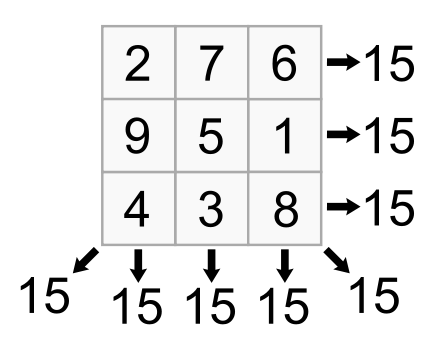

Write a function that takes a 3-by-3 integer matrix, returns `TRUE` if the matrix is a magic square, and `FALSE` otherwise.

In [107]:
m <- matrix(c(2,9,4,7,5,3,6,1,8), nrow = 3)
all(
    rowSums(m) == rep(15,3),
    colSums(m) == rep(15,3),
    sum(diag(m)) == 15,
    m[1,3]+m[2,2]+m[3,1] == 15
    )

[1] TRUE

In [108]:
is.magic <- function(m){
    if( !(nrow(m) == 3 & ncol(m) == 3)) {
        print("The matrix must be 3-by-3.")
        return()
    }
    all(
    rowSums(m) == rep(15,3),
    colSums(m) == rep(15,3),
    sum(diag(m)) == 15,
    m[1,3]+m[2,2]+m[3,1] == 15
    )
}

is.magic( matrix(c(2,9,4,7,5,3,6,1,8), nrow = 3) )  # TRUE
is.magic( matrix(1:9, ncol = 3)) # FALSE
is.magic( matrix(1:12, ncol = 3)) # error message

[1] TRUE

[1] FALSE

[1] "The matrix must be 3-by-3."


NULL

# Example: Search for a magic square

Generate many random 3-by-3 matrices with entries from 1 to 9, and try to find magic squares.

In [110]:
for (i in 1:1e5) {
    m <- matrix(sample(1:9),nrow=3)
    if (is.magic(m))
        print(m)
}

     [,1] [,2] [,3]
[1,]    2    7    6
[2,]    9    5    1
[3,]    4    3    8
